In [1]:
%matplotlib inline
from keras.preprocessing.image import load_img, img_to_array
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model
import numpy as np
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\nonam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nonam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nonam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nonam\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# Загрузка изображений
im = imread("square.bmp")
star = imread("star.bmp")
im_square = im / 255
im_star = star / 255
im_star_re = im_star.reshape(28,28, 1)
im_square_re = im_square.reshape(28,28,1)

# массив размерность 10000, 28, 28, 1, чередование нулей и единиц входных данных
a = np.array([([0], [1])*5000]).reshape(10000, 1)
# a.shape

b = np.array((im_star_re, im_square_re)*5000)#.reshape(10000, 1)
#b = b.reshape(7840000, 1)
# b.shape

In [3]:
def create_dense_ae():
    encoding_dim = 49 # Размерность кодированного представления

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(1, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='sigmoid')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [4]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 1)              0         
_________________________________________________________________
encoder (Model)              (None, 49)                98        
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         39200     
Total params: 39,298
Trainable params: 39,298
Non-trainable params: 0
_________________________________________________________________


In [5]:
autoencoder.fit(a.reshape(10000, 1, 1), b,
                epochs=50,
                batch_size=256,
                shuffle=True,
                 validation_data=(a.reshape(10000, 1, 1), b))
               

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 10000 samples, validate on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 1s 122us/step - loss: 0.5207 - val_loss: 0.3654
Epoch 2/50
10000/10000 [==============================] - 1s 97us/step - loss: 0.2856 - val_loss: 0.2211
Epoch 3/50
10000/10000 [==============================] - 1s 101us/step - loss: 0.1883 - val_loss: 0.1604
Epoch 4/50
10000/10000 [==============================] - 1s 102us/step - loss: 0.1445 - val_loss: 0.1302
Epoch 5/50
10000/10000 [==============================] - 1s 92us/step - loss: 0.1211 - val_loss: 0.1123
Epoch 6/50
10000/10000 [==============================] - 1s 92us/step - loss: 0.1059 - val_loss: 0.0996
Epoch 7/50
10000/10000 [==============================] - 1s 104us/step - loss: 0.0945 - val_loss: 0.0893
Epoch 8/50
10000/10000 [==============================] - 1s 90us/step - loss: 0.0849 - val_loss: 0.0801
Epoch 9/50


In [13]:
def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

def single_plot_digits(args):
    
    #  Двумерный массив пикселей:
    my_img = args[0].reshape(28, 28)
    # my_img.shape

    fig, ax = plt.subplots()

    ax.imshow(my_img)

    fig.set_figwidth(1)    #  ширина и
    fig.set_figheight(1)    #  высота "Figure"
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

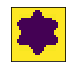

None


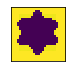

None


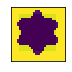

None


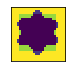

None


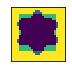

None


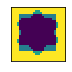

None


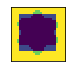

None


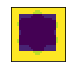

None


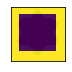

None


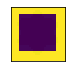

None


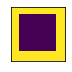

None


In [14]:
def autoencoder_predict(p):
    decoded_imgs = autoencoder.predict(np.array(p).reshape(1,1,1), batch_size=10)
    single_plot_digits(decoded_imgs)
p = 0
while p <= 1:
    print(autoencoder_predict(p))
    p += 0.1
